<a href="https://colab.research.google.com/github/isaacdavii/Trabalho_IA_MachineLearning/blob/main/Trabalho_IA_Grupo_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho da disciplina de IA

---

### Professora:
*   Isabela Neves Drummond

### Alunos:
* Isaac Davi Mendonça Viana - 2023000650
* Kaio Magno Cezário de Cássio - 2023007650
* Marcos Eduardo Alves de Souza - 2023010155
* Pedro Paulo Araujo Carvalho - 2023000909
* Samuel Guedes Nascimento - 2023012991

---


```
Data da apresentação 18/06/24
```


O conjunto de dados utilizado neste notebook é traz informações sobre apartamentos de Moscou. O objetivo é, a partir dos dados dos apartamentos, definir se ele é um imóvel `novo` ou `não`.

 Atributos dos dados:

- min_metro: Minutos do apartamento até o metrô mais próximo
- area_total: Área construída do imóvel
- area_util: Área utilizável do imóvel
- andar: Andar em que se encontra o imóvel
- pe_direito: Altura do piso ao teto do imóvel
- numero_comodos: Quantidade de cômodos
- novo: Indica se o apartamento é novo (1) ou não (0)

O conjunto de dados foi importado pelo Google Drive e sua carga é feita em um DataFrame Pandas.

### Passos para a Análise
1. Importar as Bibliotecas Necessárias
2. Carregar e Preparar os Dados
3. Dividir os Dados em Conjunto de Treinamento e Teste
4. Treinar o Modelo KNN
5. Fazer Previsões
6. Avaliar o Modelo
7. Visualizar os Resultados

### Importando as bibliotecas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando e preparando os dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Trabalho_IA_Isabela/apartamentos.csv')
df.head()

,min_metro,area_total,area_util,andar,novo,pe_direito,numero_comodos
0,24.0,64.20,32.4,11.0,1.0,3.15,2.0
1,5.0,72.40,33.6,3.0,1.0,3.15,2.0
2,27.0,66.90,24.8,9.0,1.0,3.00,2.0
3,20.0,66.00,29.9,8.0,1.0,3.00,2.0
4,5.0,65.55,34.4,26.0,1.0,2.87,2.0


In [ ]:
# Selecionar atributos e alvo
X = df.drop(columns = ['novo'])  # 'novo' é a variável alvo
y = df['novo']  # 'novo' é a variável alvo

### Dividir os dados em conjuntos de treinamento e teste

In [ ]:
# Divisão dos dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Treinar o Modelo KNN

Instanciando e treinando o modelo.

In [ ]:
# Instanciar o modelo KNN
knn = KNeighborsClassifier(n_neighbors = 5)  # Aqui n_neighbors é o número de vizinhos. Pode ser ajustado.

# Treinar o modelo
knn.fit(X_treino, y_treino)


KNeighborsClassifier()

### Fazendo previsões

Usando o modelo treinado pra fazer previsões sobre o conjunto de teste.

In [ ]:
# Previsões
y_pred = knn.predict(X_teste)

### Avaliar o Modelo

Avaliando o desempenho do modelo usando métricas de acurácia e relatório de classificação.

In [ ]:
# Avaliação do modelo
accuracy = accuracy_score(y_teste, y_pred)
classification_rep = classification_report(y_teste, y_pred)

print(f"Acurácia: {accuracy:.2f}")
print()
print(f"Resultado da classificação:\n{classification_rep}")


Acurácia: 0.80

Resultado da classificação:
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85       580
         1.0       0.74      0.66      0.69       316

    accuracy                           0.80       896
   macro avg       0.78      0.76      0.77       896
weighted avg       0.79      0.80      0.79       896



### Visualizar os resultados

Criamos um modelo de visualização para entender melhor os resultados.

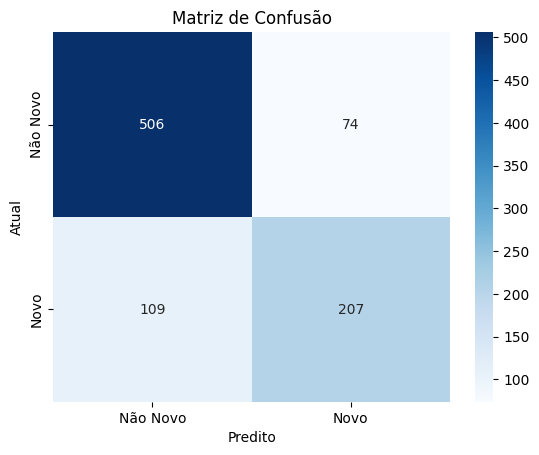

In [ ]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_teste, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues", xticklabels = ['Não Novo', 'Novo'], yticklabels = ['Não Novo', 'Novo'])
plt.xlabel('Predito')
plt.ylabel('Atual')
plt.title('Matriz de Confusão')
plt.show()


## Conclusão


1. Acurácia do Modelo
```
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
```


A acurácia é a proporção de previsões corretas em relação ao total de previsões feitas. Uma acurácia alta indica que o modelo está fazendo previsões corretas na maioria das vezes. No entanto, a acurácia sozinha não é suficiente para avaliar a performance de um modelo, especialmente em casos de classes desbalanceadas.

2. Relatório de Classificação
```
classification_rep = classification_report(y_test, y_pred)
print(f"Classification Report:\n{classification_rep}")
```
O relatório de classificação fornece métricas detalhadas:

- Precisão (Precision): Proporção de verdadeiros positivos sobre o total de elementos classificados como positivos.
- Revocação (Recall): Proporção de verdadeiros positivos sobre o total de elementos que são realmente positivos.
- F1-Score: Média harmônica entre precisão e recall, balanceando ambos.
- Suporte (Support): Número de ocorrências de cada classe no conjunto de teste.
3. Matriz de Confusão

```
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Não Novo', 'Novo'], yticklabels=['Não Novo', 'Novo'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão')
plt.show()
```

A matriz de confusão mostra o número de previsões corretas e incorretas divididas por classe:

- True Positives (TP): Apartamentos novos corretamente classificados como novos.
- True Negatives (TN): Apartamentos não novos corretamente classificados como não novos.
- False Positives (FP): Apartamentos não novos incorretamente classificados como novos.
- False Negatives (FN): Apartamentos novos incorretamente classificados como não novos.




## Interpretação dos Resultados








1. Desempenho Geral:

- A acurácia mostra uma visão geral de quão bem o modelo está performando, mas deve ser interpretada junto com as outras métricas.
- Se a acurácia é alta (por exemplo, acima de 0.8), indica que o modelo está fazendo boas previsões.

2. Precisão e Revocação:

- Alta precisão significa que quando o modelo prediz um apartamento como novo, ele geralmente está correto.
- Alta revocação significa que o modelo consegue identificar a maioria dos apartamentos novos corretamente.
- Um alto F1-Score indica um bom balanço entre precisão e recall.

3. Matriz de Confusão:

- Valores altos na diagonal principal (TP e TN) indicam muitas previsões corretas.
- Valores baixos fora da diagonal principal (FP e FN) indicam poucas previsões incorretas.





## Pontos de Melhoria


- Ajuste de Hiperparâmetros: Experimente diferentes valores para n_neighbors para ver se a performance melhora.
- Normalização dos Dados: A performance do KNN pode melhorar se as características forem normalizadas, já que ele é baseado na distância.
- Análise de Classes Desbalanceadas: Se as classes estão desbalanceadas, considere técnicas de balanceamento como oversampling ou undersampling.



## Conclusão Final


Com base nos resultados obtidos:

- Se a acurácia, precisão, recall e F1-score forem altos, podemos inferir que o modelo KNN está performando bem e é eficaz para classificar apartamentos como novos ou não novos.
- A matriz de confusão corroborará essas inferências mostrando poucas previsões incorretas.

Se os resultados não forem satisfatórios, pode ser necessário ajustar o modelo ou explorar outras técnicas de classificação para melhorar a performance.
